In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

import datetime as dt

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precip_date_query = session.query(Measurement.date, Measurement.prcp)\
.filter(Measurement.date <= dt.date(2017, 8, 23), Measurement.date >= last_year)\
.order_by(Measurement.date.desc()).all()

precip_date_query


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_date_query)

precip_df.columns=["Date", "Precipitation (inches)"]

precip_df.set_index("Date",inplace=True)

# Sort the dataframe by date
precip_df.sort_index(inplace=True)
precip_df





,Precipitation (inches)
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


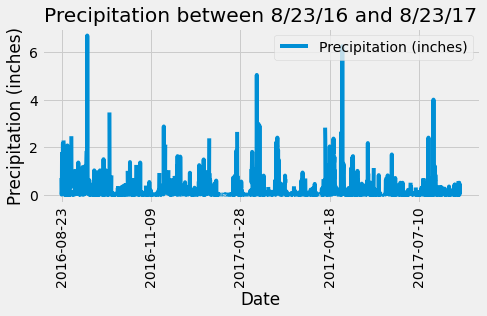

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_df.plot(title="Precipitation between 8/23/16 and 8/23/17",
               xlabel="Date",
               ylabel="Precipitation (inches)",
              rot=90,
               figsize=(7,3)
              )
plt.legend(loc="upper right")

plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation (inches)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations_count = session.query(Station.station).count()
stations_count

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)

stations = session.query(Measurement.station).all()
stations
stations_unique = list(np.ravel(stations))
stations_unique
from collections import Counter
most_active_station = Counter(stations).most_common(1)[0][0][0]
most_active_station

'USC00519281'

In [15]:
# List the stations and the counts in descending order.
station_list = Counter(stations).most_common
station_dict = {}

for key, value in Counter(stations).items():
    station_dict[key[0]] = value
    
station_df = pd.DataFrame([station_dict]).transpose()
station_df.columns=["Observation Counts"]
station_df.index.name="Station"
station_df.sort_values(by="Observation Counts", ascending=False)

,Observation Counts
Station,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612
USC00514830,2202
USC00511918,1979
USC00517948,1372
USC00518838,511


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

station_lowest_temp = session.query(Measurement.station,Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
station_lowest_temp

temp_df = pd.DataFrame(station_lowest_temp)
temp_df

temp_df.columns=["Stataion", "Temp"]
temp_min = temp_df["Temp"].min()
print(f"Min Temp: {temp_min}")

temp_max = temp_df["Temp"].max()
print(f"Max Temp: {temp_max}")

temp_avg = temp_df["Temp"].mean()
print(f"Avg Temp: {round(temp_avg,1)}")

Min Temp: 54.0
Max Temp: 85.0
Avg Temp: 71.7


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
recent_station_date = session.query(Measurement.date)\
.filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
recent_station_date

# Calculate the date one year from the last date in data set.
one_year_timeframe = dt.date(2017, 8, 18) - dt.timedelta(days=365)

# Perform a query to retrieve the data
temp_data = session.query(Measurement.date, Measurement.tobs)\
.filter(Measurement.date <= dt.date(2017, 8, 18), Measurement.date >= one_year_timeframe)\
.order_by(Measurement.date.desc()).all()

temp_data


[('2017-08-18', 80.0),
 ('2017-08-18', 77.0),
 ('2017-08-18', 79.0),
 ('2017-08-18', 76.0),
 ('2017-08-17', 78.0),
 ('2017-08-17', 83.0),
 ('2017-08-17', 76.0),
 ('2017-08-17', 72.0),
 ('2017-08-16', 82.0),
 ('2017-08-16', 79.0),
 ('2017-08-16', 76.0),
 ('2017-08-16', 71.0),
 ('2017-08-15', 78.0),
 ('2017-08-15', 82.0),
 ('2017-08-15', 79.0),
 ('2017-08-15', 77.0),
 ('2017-08-15', 70.0),
 ('2017-08-14', 79.0),
 ('2017-08-14', 81.0),
 ('2017-08-14', 75.0),
 ('2017-08-14', 77.0),
 ('2017-08-14', 79.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 81.0),
 ('2017-08-13', 84.0),
 ('2017-08-13', 77.0),
 ('2017-08-13', 80.0),
 ('2017-08-12', 80.0),
 ('2017-08-12', 83.0),
 ('2017-08-12', 74.0),
 ('2017-08-11', 78.0),
 ('2017-08-11', 81.0),
 ('2017-08-11', 81.0),
 ('2017-08-11', 72.0),
 ('2017-08-10', 81.0),
 ('2017-08-10', 81.0),
 ('2017-08-10', 80.0),
 ('2017-08-10', 75.0),
 ('2017-08-09', 80.0),
 ('2017-08-09', 81.0),
 ('2017-08-09', 71.0),
 ('2017-08-08', 80.0),
 ('2017-08-08', 78.0),
 ('2017-08-

In [18]:
# Create a DataFrame for the histogram
histogram_df = pd.DataFrame(temp_data)

histogram_df.columns=["Date", "Temp (F)"]
histogram_df

histogram_df.set_index("Date",inplace=True)
histogram_df

,Temp (F)
Date,
2017-08-18,80.0
2017-08-18,77.0
2017-08-18,79.0
2017-08-18,76.0
2017-08-17,78.0
...,...
2016-08-18,79.0
2016-08-18,81.0
2016-08-18,81.0


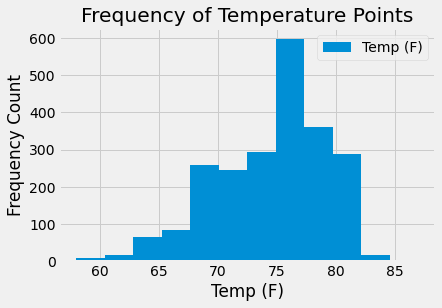

In [19]:
# Plot the results as a histogram
histogram_df.hist(bins=12, legend=True)
plt.title("Frequency of Temperature Points")
plt.xlabel("Temp (F)")
plt.ylabel("Frequency Count")
plt.show()

In [20]:
# Close Session
session.close()